In [2]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import AldousBroder
import policyiteration
import valueiteration

In [5]:
avg_policy_iterations = []
for i in range(3, 50, 2):
    policy_iterations = []
    for _ in range(25):
        test_maze = AldousBroder.AldousBroder(w=i, h=i).generate()
        test_mdp = AldousBroder.maze_to_mdp(test_maze)
        iters = policyiteration.policy_iteration(test_mdp, .9)
        policy_iterations.append(iters)
    avg_policy_iterations.append(np.average(policy_iterations))

In [8]:
avg_value_iterations = []
for i in range(3, 50, 2):
    value_iterations = []
    for _ in range(25):
        test_maze = AldousBroder.AldousBroder(w=i, h=i).generate()
        test_mdp = AldousBroder.maze_to_mdp(test_maze)
        iters = valueiteration.value_iteration(test_mdp, .9)
        value_iterations.append(iters)
    avg_value_iterations.append(np.average(value_iterations))

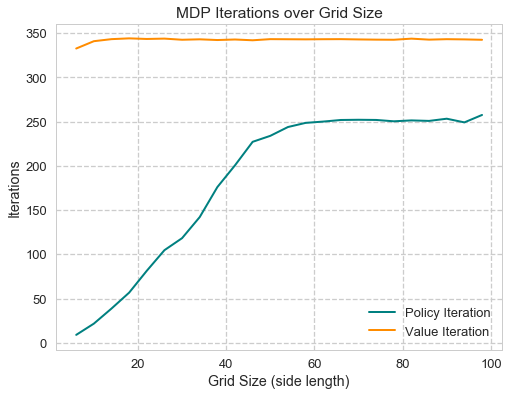

In [20]:
# plotting

sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Arial',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

plt.figure(figsize = [8,6])

plt.plot(np.multiply(range(3, 50, 2), 2), avg_policy_iterations, c='teal', label='Policy Iteration')
plt.plot(np.multiply(range(3, 50, 2), 2), avg_value_iterations, c='darkorange', label='Value Iteration')


plt.xlabel("Grid Size (side length)")
plt.ylabel('Iterations')
plt.title("MDP Iterations over Grid Size")
plt.legend(loc="lower right")
plt.show()

In [4]:
gamma_values = np.arange(0.01, 1.0, 0.01)

In [7]:
avg_policy_iterations_gam = []
for gamma in gamma_values:
    policy_iterations = []
    for _ in range(25):
        test_maze = AldousBroder.AldousBroder(w=10, h=10).generate()
        test_mdp = AldousBroder.maze_to_mdp(test_maze)
        iters = policyiteration.policy_iteration(test_mdp, gamma)
        policy_iterations.append(iters)
    avg_policy_iterations_gam.append(np.average(policy_iterations))

In [5]:
avg_value_iterations_gam = []
for gamma in gamma_values:
    value_iterations = []
    for _ in range(25):
        test_maze = AldousBroder.AldousBroder(w=10, h=10).generate()
        test_mdp = AldousBroder.maze_to_mdp(test_maze)
        iters = valueiteration.value_iteration(test_mdp, gamma)
        value_iterations.append(iters)
    avg_value_iterations_gam.append(np.average(value_iterations))

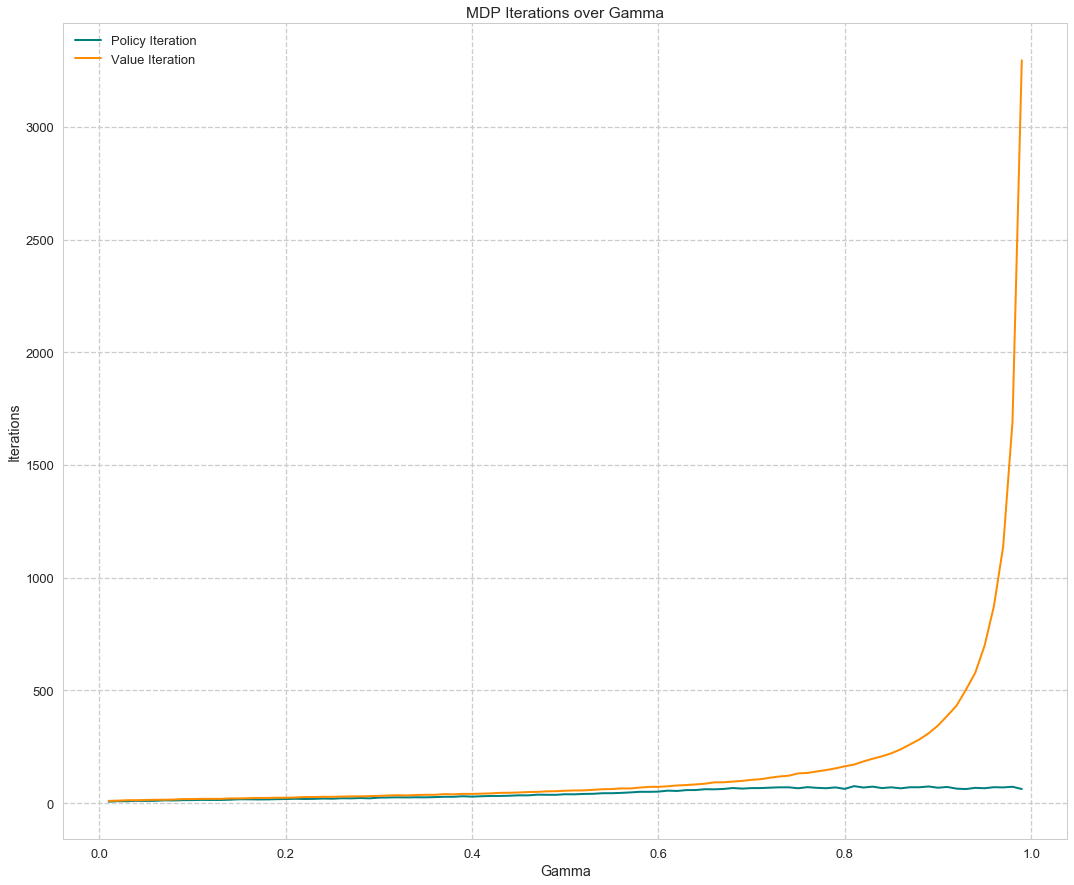

In [15]:
# plotting

sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Arial',
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

plt.figure(figsize = [18, 15])

plt.plot(gamma_values, avg_policy_iterations_gam, c='teal', label='Policy Iteration')
plt.plot(gamma_values, avg_value_iterations_gam, c='darkorange', label='Value Iteration')


plt.xlabel("Gamma")
plt.ylabel('Iterations')
plt.title("MDP Iterations over Gamma")
plt.legend(loc="upper left")
plt.show()